### Data Source

The Consumer Complaint Database [https://www.consumerfinance.gov/data-research/consumer-complaints/search/?from=0&searchField=all&searchText=&size=25&sort=created_date_desc  ] from Consumer Financial Protection Bureau.

I downloaded the data on May 16, 2019. 
"complaints-2019-05-16_13_17.csv" file contains complaints with narratives. 383,958 records.
"Consumer_Complaints.csv" file contains all complaints with those records with no narratives. 1,285,487 complaints.  

Discription of the columns of the data.
https://www.consumerfinance.gov/complaint/data-use/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [2]:
complaints = pd.read_csv('data/Consumer_Complaints.csv')
#complaints = pd.read_csv("data/complaints-2019-05-16_13_17.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
pp.ProfileReport(complaints)

Number of variables,18
Number of observations,383958
Total Missing (%),3.2%
Total size in memory,52.7 MiB
Average record size in memory,144.0 B
Numeric,1
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [15]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/15/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",CA,95503,NaN,Consent not provided,Web,05/15/2019,Closed with explanation,Yes,NaN,3243010
1,05/15/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,ALLY FINANCIAL INC.,CA,945XX,NaN,NaN,Web,05/15/2019,In progress,Yes,NaN,3242607
2,05/15/2019,Debt collection,Payday loan debt,Threatened to contact someone or share informa...,Contacted your employer,NaN,NaN,F&M Capital LLC,MI,NaN,NaN,NaN,Web,05/15/2019,Closed with explanation,Yes,NaN,3242659
3,05/15/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,ALLY FINANCIAL INC.,TN,370XX,NaN,NaN,Web,05/15/2019,In progress,Yes,NaN,3242618
4,05/15/2019,Debt collection,Other debt,Communication tactics,"You told them to stop contacting you, but they...",NaN,NaN,"Diversified Consultants, Inc.",MA,017XX,NaN,NaN,Web,05/15/2019,In progress,Yes,NaN,3243098


### Check NaN in columns

In [19]:
col_num = complaints.shape[1]
for i in np.arange(col_num):
    print(complaints.iloc[:, i].dtype)
    if complaints.iloc[:, i].isnull:
        print("Column {}: {} contains Nan.".format(i, complaints.columns.values[i]))

object
Column 0: Date received contains Nan.
object
Column 1: Product contains Nan.
object
Column 2: Sub-product contains Nan.
object
Column 3: Issue contains Nan.
object
Column 4: Sub-issue contains Nan.
object
Column 5: Consumer complaint narrative contains Nan.
object
Column 6: Company public response contains Nan.
object
Column 7: Company contains Nan.
object
Column 8: State contains Nan.
object
Column 9: ZIP code contains Nan.
object
Column 10: Tags contains Nan.
object
Column 11: Consumer consent provided? contains Nan.
object
Column 12: Submitted via contains Nan.
object
Column 13: Date sent to company contains Nan.
object
Column 14: Company response to consumer contains Nan.
object
Column 15: Timely response? contains Nan.
object
Column 16: Consumer disputed? contains Nan.
int64
Column 17: Complaint ID contains Nan.


### Look at the unique values for each column

In [8]:
col_num = complaints.shape[1]
for i in np.arange(col_num):
    print("Column {}: Values of \"{}\"".format(i, complaints.columns.values[i]))
    print("Number of unique values {}".format(len(complaints.iloc[:,i].unique())))
    #print(complaints.iloc[:,i].unique())

Column 0: Values of "Date received"
Number of unique values 1970
Column 1: Values of "Product"
Number of unique values 13
Column 2: Values of "Sub-product"
Number of unique values 51
Column 3: Values of "Issue"
Number of unique values 99
Column 4: Values of "Sub-issue"
Number of unique values 62
Column 5: Values of "Consumer complaint narrative"
Number of unique values 160983
Column 6: Values of "Company public response"
Number of unique values 11
Column 7: Values of "Company"
Number of unique values 4290
Column 8: Values of "State"
Number of unique values 63
Column 9: Values of "ZIP code"
Number of unique values 18935
Column 10: Values of "Tags"
Number of unique values 4
Column 11: Values of "Consumer consent provided?"
Number of unique values 5
Column 12: Values of "Submitted via"
Number of unique values 6
Column 13: Values of "Date sent to company"
Number of unique values 2049
Column 14: Values of "Company response to consumer"
Number of unique values 8
Column 15: Values of "Timely 

### Remove Nan in "Consumer disputed?"
These data are not labeled yet. We can not use these data to train and validate

In [3]:
complaints = complaints.dropna(subset=["Consumer disputed?"])

In [4]:
len(complaints)

768501

In [5]:
print("Number of complaints with narrative", len(complaints.dropna(subset=["Consumer complaint narrative"])))

Number of complaints with narrative 164076


### Count each subject

### See the number of complaints if removing all nan fields

In [57]:
temp = complaints
print(len(temp))
print("Complaints number with all fields filled is {}.".format(len(temp.dropna())))

1285487
Complaints number with all fields filled is 2301.


### Check nan number in each column

In [34]:
col_num = len(complaints.columns)
for i in np.arange(col_num):
    col_name = complaints.columns[i]
    na_num = np.sum(complaints[col_name].isna())
    print("Number of Na in column {} is {}.".format(col_name, na_num))

Number of Na in column Date received is 0.
Number of Na in column Product is 0.
Number of Na in column Sub-product is 235166.
Number of Na in column Issue is 0.
Number of Na in column Sub-issue is 455416.
Number of Na in column Consumer complaint narrative is 604425.
Number of Na in column Company public response is 572792.
Number of Na in column Company is 0.
Number of Na in column State is 5651.
Number of Na in column ZIP code is 46569.
Number of Na in column Tags is 660542.
Number of Na in column Consumer consent provided? is 470584.
Number of Na in column Submitted via is 0.
Number of Na in column Date sent to company is 0.
Number of Na in column Company response to consumer is 1.
Number of Na in column Timely response? is 0.
Number of Na in column Consumer disputed? is 0.
Number of Na in column Complaint ID is 0.


## Check columns not to be used in the data
Check columns to see whether they have effect on classification.

### Find whether there are multiple complaints submitted by same user

In [48]:
complaints.groupby("Complaint ID").count()["Issue"].max()

1

There is no complaints submitted by same user. We don't need this column. 
But the column is the only column containing no na value, which is useful for counting.

### Check whether we need Tags column

In [51]:
complaints.groupby("Tags").count()["Issue"]

Tags
Older American                   77094
Older American, Servicemember    14034
Servicemember                    84916
Name: Issue, dtype: int64

In [54]:
complaints["Tags"].isna().sum()

1109443

There is a lot of Nan in this field. I am not sure whether the "older American, and serciemember" tag could cause some discrimitive issue.  May be not use "Tags" column for now. 

### Check the number of dispute of top 20 companies

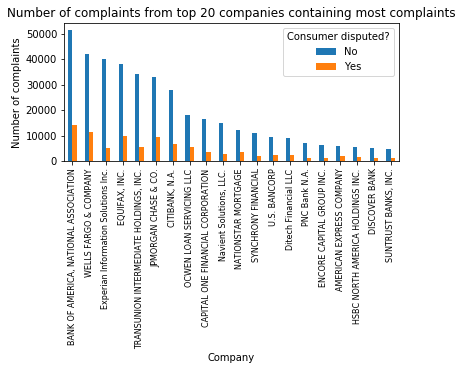

In [16]:
dispute_by_company = complaints.groupby(["Company", "Consumer disputed?"]).count()["Complaint ID"].unstack().sort_values(by=["No"], ascending=False)
dispute_by_top_company = dispute_by_company[0:20]
dispute_by_top_company.plot.bar()
plt.ylabel("Number of complaints")
plt.xticks(fontsize=8)
plt.title("Number of complaints from top 20 companies containing most complaints")
plt.gcf().subplots_adjust(bottom=0.4)
plt.savefig("top20_company.png")

It can be seen that "Experian Information Solutions Inc" has better strategy of dealing with complaints. Although it contains more complaints than the following two companies, it contains far less disputed ones.  Let's have a look of the dispute ratio within this top 20 companies.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Dispute Ratio')

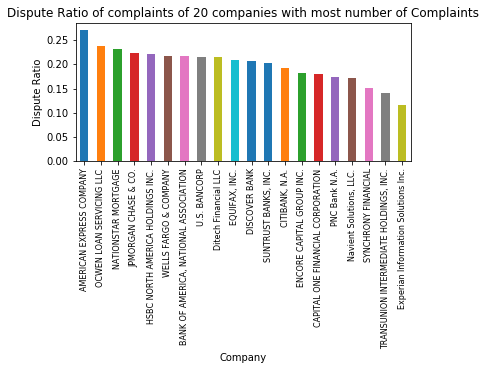

In [29]:
dispute_by_top_company["dispute_ratio"] = dispute_by_top_company["Yes"] / (dispute_by_top_company["Yes"] + dispute_by_top_company["No"])
dispute_ratio_by_top_company = dispute_by_top_company["dispute_ratio"].sort_values(ascending=False)
dispute_ratio_by_top_company.plot.bar()
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.4)
plt.title("Dispute Ratio of complaints of 20 companies with most number of Complaints")
plt.ylabel("Dispute Ratio")

It can tell that "Experian Information Solutions Inc." do has the smallest dispute rate although its complaint number is top 3.  It's strategy of dealing with complaints deserve research.

### Examine complaints especially to "Experian Information Solutions Inc" company
In the previous two graph, the "Experian Information Solutions Inc" company contains the lowest dispute ratio while top 3 complaints number.  Let's extract its data.

In [28]:
experian_complaints = complaints[complaints["Company"] == "Experian Information Solutions Inc."]
len(experian_complaints)

45622

### Check whether "Company public response" related to whether dispute or not

In [59]:
complaints.groupby(["Company public response", "Consumer disputed?"]).count()

Date received  \
Company public response                            Consumer disputed?                  
Company believes complaint caused principally b... No                           2220   
                                                   Yes                           330   
Company believes complaint is the result of an ... No                           2045   
                                                   Yes                           270   
Company believes complaint relates to a discont... No                             33   
                                                   Yes                             9   
Company believes complaint represents an opport... No                            941   
                                                   Yes                           125   
Company believes it acted appropriately as auth... No                          26956   
                                                   Yes                          7173   
Company believes the complaint is the result of... No                           2652   
                                                   Yes                           490   
Company can't verify or dispute the facts in th... No                           1264   
                                                   Yes                           280   
Company chooses not to provide a public response   No                          42639   
                                                   Yes                          9834   
Company disputes the facts presented in the com... No                           2169   
                                                   Yes                           691   
Company has responded to the consumer and the C... No                          81284   
                                                   Yes                         14304   

                                                                       Product  \
Company public response                            Consumer disputed?            
Company believes complaint caused principally b... No                     2220   
                                                   Yes                     330   
Company believes complaint is the result of an ... No                     2045   
                                                   Yes                     270   
Company believes complaint relates to a discont... No                       33   
                                                   Yes                       9   
Company believes complaint represents an opport... No                      941   
                                                   Yes                     125   
Company believes it acted appropriately as auth... No                    26956   
                                                   Yes                    7173   
Company believes the complaint is the result of... No                     2652   
                                                   Yes                     490   
Company can't verify or dispute the facts in th... No                     1264   
                                                   Yes                     280   
Company chooses not to provide a public response   No                    42639   
                                                   Yes                    9834   
Company disputes the facts presented in the com... No                     2169   
                                                   Yes                     691   
Company has responded to the consumer and the C... No                    81284   
                                                   Yes                   14304   

                                                                       Sub-product  \
Company public response                            Consumer disputed?                
Company believes complaint caused principally b... No                         1710   
                                                   Yes                 

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response.')

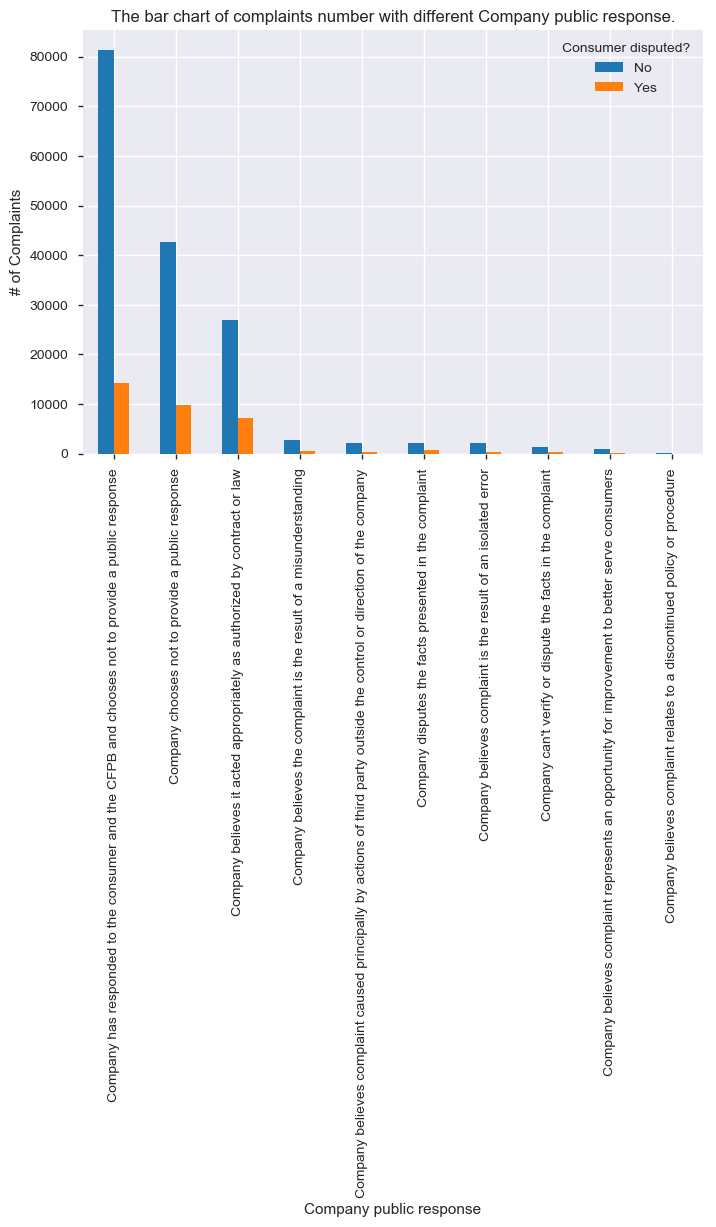

In [76]:
public_response_to_dispute = complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
public_response_to_dispute = public_response_to_dispute.sort_values(by=["No"], ascending=False)
public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response.")

### Do the same to Experin company

Text(0.5, 1.0, 'The bar chart of complaints number with different Company public response by Experian.')

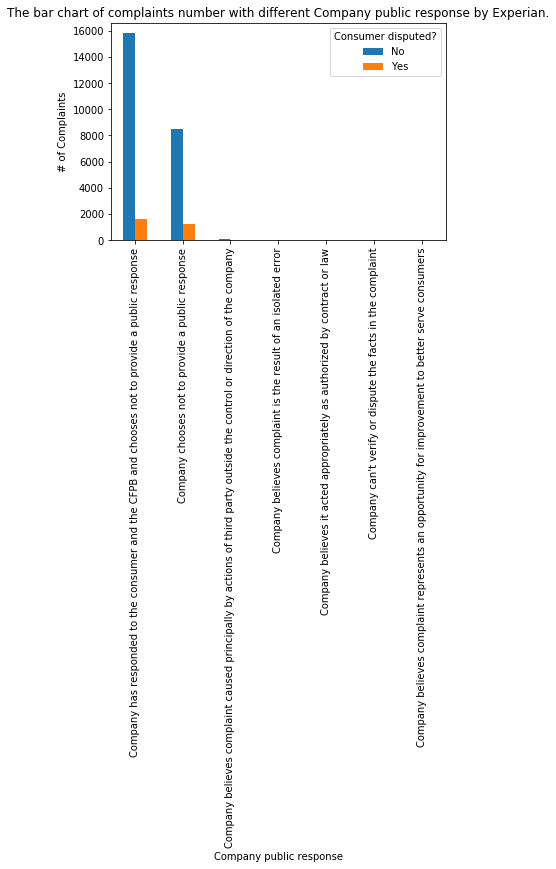

In [30]:
experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()

experian_public_response_to_dispute = experian_complaints.groupby(["Company public response", "Consumer disputed?"]).count()["Complaint ID"].unstack()
experian_public_response_to_dispute = experian_public_response_to_dispute.sort_values(by=["No"], ascending=False)
experian_public_response_to_dispute.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company public response by Experian.")

### Check how the "Company response to consumer" is related to "related to whether dispute or not".

In [60]:
complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()

Date received  Product  \
Company response to consumer    Consumer disputed?                           
Closed                          No                          13986    13986   
                                Yes                          3625     3625   
Closed with explanation         No                         455181   455181   
                                Yes                        122695   122695   
Closed with monetary relief     No                          45941    45941   
                                Yes                          5439     5439   
Closed with non-monetary relief No                          84326    84326   
                                Yes                         11098    11098   
Closed with relief              No                           4596     4596   
                                Yes                           708      708   
Closed without relief           No                          13057    13057   
                                Yes                          4811     4811   
Untimely response               No                           3035     3035   
                                Yes                             2        2   

                                                    Sub-product   Issue  \
Company response to consumer    Consumer disputed?                        
Closed                          No                        12915   13986   
                                Yes                        3371    3625   
Closed with explanation         No                       329218  455181   
                                Yes                       90025  122695   
Closed with monetary relief     No                        28507   45941   
                                Yes                        3410    5439   
Closed with non-monetary relief No                        40594   84326   
                                Yes                        6264   11098   
Closed with relief              No                         2351    4596   
                                Yes                         425     708   
Closed without relief           No                         9793   13057   
                                Yes                        3767    4811   
Untimely response               No                         2692    3035   
                                Yes                           2       2   

                                                    Sub-issue  \
Company response to consumer    Consumer disputed?              
Closed                          No                       6372   
                                Yes                      1379   
Closed with explanation         No                     192628   
                                Yes                     44500   
Closed with monetary relief     No                       3229   
                                Yes                       355   
Closed with non-monetary relief No                      56292   
                                Yes                      6300   
Closed with relief              No                          1   
                                Yes                         0   
Closed without relief           No                          1   
                                Yes                         1   
Untimely response               No                       2026   
                                Yes                         0   

                                                    Consumer complaint narrative  \
Company response to consumer    Consumer disputed?                                 
Closed                          No                                          2751   
                                Yes                                          990   
Closed with explanation         No                                         97323   
                                Yes                                        31122   
Closed with monetary relief     No                       

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer.')

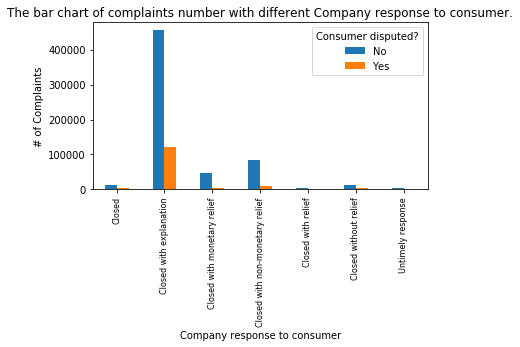

In [30]:
response_to_disputed = complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.xticks(fontsize=8)
plt.gcf().subplots_adjust(bottom=0.3)
plt.title("The bar chart of complaints number with different Company response to consumer.")

### Check the strategy of Experian Information Inc.

Text(0.5, 1.0, 'The bar chart of complaints number with different Company response to consumer by Experian Information Inc.')

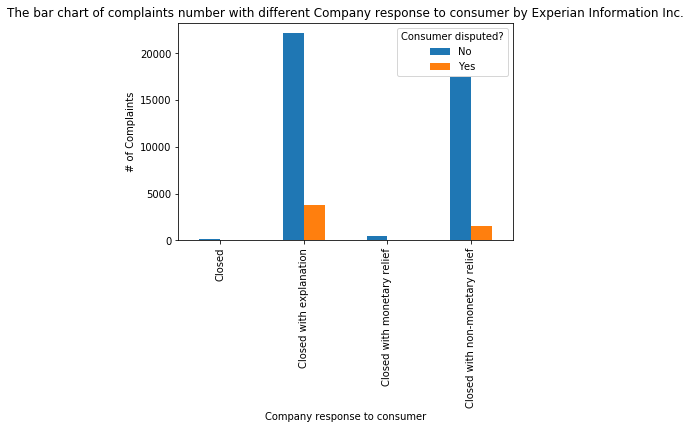

In [32]:
response_to_disputed = experian_complaints.groupby(["Company response to consumer", "Consumer disputed?"]).count()["Complaint ID"].unstack()
#repsonse_to_disputed = response_to_disputed.sort_values(by=["No"], ascending=False)
response_to_disputed.plot.bar()
plt.ylabel("# of Complaints")
plt.title("The bar chart of complaints number with different Company response to consumer by Experian Information Inc.")